In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler

In [2]:
import os
os.getcwd()

'c:\\Users\\NTX550\\deepTest'

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
a = df[df['gender']=='Other'].index
df.drop(a,inplace=True)


In [4]:
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
'gender':1,0 
'ever_married':1,0
'Residence_type':1,0
'work_type':공기업 0 prvate 1 selfempy 2 

In [5]:
df['smoking_status'].head(5)

0    formerly smoked
1       never smoked
2       never smoked
3             smokes
4       never smoked
Name: smoking_status, dtype: object

In [6]:
df['smoking_status'].replace({'formerly smoked':1,
                              'never smoked':0,
                              'smokes':2,
                              'Unknown':0
                              },inplace=True)

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,2,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1


In [ ]:
# 'gender':1,0 
# 'ever_married':1,0
# 'Residence_type':1,0
# 'work_type':공기업 0 prvate 1 selfempy 2 

In [8]:
features=['age','gender','hypertension','heart_disease', 'ever_married',
          'work_type', 'Residence_type' , 'avg_glucose_level','bmi','smoking_status']#데이터와 관련없는 id 제거
x=df[features]
y_before=df['stroke']
y=pd.DataFrame(y_before)
y.columns=['target_y']



결측치 : 중앙값 대치 

In [9]:

x.info()
x.fillna(x['bmi'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5109 non-null   float64
 1   gender             5109 non-null   object 
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 439.1+ KB


C:\Users\NTX550\AppData\Local\Temp\ipykernel_12976\4195435493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(x['bmi'].median(), inplace=True)


In [10]:

from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(random_state=312, categorical_features=[1,2,3,4,5,6])
x_over, y_over = oversample.fit_resample(x, y)
print(y_over.value_counts())

target_y
0           4860
1           4860
dtype: int64


In [11]:

x_over['gender'].replace({'Male':1,
                              'Female':0,
                              },inplace=True)
x_over['ever_married'].replace({'Yes':1,
                              'No':0,
                              },inplace=True)
x_over['Residence_type'].replace({'Urban':1,
                              'Rural':0,
                              },inplace=True)
x_over['work_type'].replace({'Private':1,
                              'Self-employed':2,
                              'Govt_job':0,
                              'children':0,
                              'Never_worked':0
                              
                              },inplace=True)

In [12]:
scaleF = MinMaxScaler()
x_over = scaleF.fit_transform(x_over)

In [14]:
x_over1 = pd.DataFrame(x_over)

In [19]:
x_over1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9720 non-null   float64
 1   1       9720 non-null   float64
 2   2       9720 non-null   float64
 3   3       9720 non-null   float64
 4   4       9720 non-null   float64
 5   5       9720 non-null   float64
 6   6       9720 non-null   float64
 7   7       9720 non-null   float64
 8   8       9720 non-null   float64
 9   9       9720 non-null   float64
dtypes: float64(10)
memory usage: 759.5 KB


In [22]:
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False 

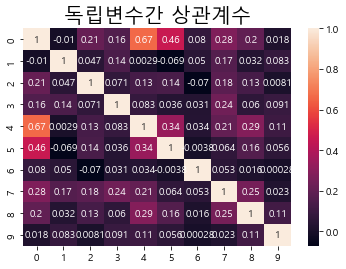

In [23]:
sns.heatmap(x_over1.corr(method='pearson'),
            annot=True)
plt.title('독립변수간 상관계수', fontsize=20)
#plt.xlabel('성별',	'나이',	'고혈압',	'심장병'	,'결혼','직업형태',	'거주형태',	'혈당',	'비만도'	,'흡연', fontsize=14)
#plt.ylabel('성별',	'나이',	'고혈압',	'심장병'	,'결혼','직업형태',	'거주형태',	'혈당',	'비만도'	,'흡연', fontsize=14)
plt.show()

eda

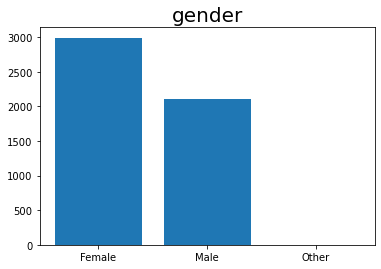

In [11]:
var = x.groupby('gender')['gender'].count()
plt.title('gender', fontsize=20)
plt.bar(var.index, var) 
plt.xticks([0, 1, 2])
plt.show()

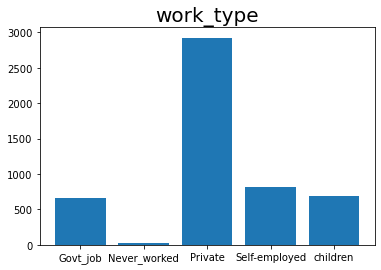

In [12]:
var = x.groupby('work_type')['work_type'].count()
plt.title('work_type', fontsize=20)
plt.bar(var.index, var) 
plt.xticks([0, 1, 2, 3, 4])
plt.show()

In [17]:
def pie_graph(df,title,values):   
    labels = df[values].value_counts().index
    values = df[values].value_counts()

    fig = go.Figure(data = [
        go.Pie(
        labels = labels,
        values = values,
        hole = .5)
    ])

    fig.update_layout(title_text = title)
    fig.show()
pie_graph(x_train, 'Hypertension Distribution','hypertension')

In [39]:
# oh_encoder = OneHotEncoder()
# oh_encoder.fit(x_over)
# oh_labels = oh_encoder.transform(x_over)
# print(oh_labels.shape)

In [40]:
from tensorflow import keras
from tensorflow.keras import layers 

In [41]:
#데이터 파티셔닝
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, train_size=0.7, test_size=0.3, random_state=77)

In [42]:
x_train.shape

(6804, 10)

In [45]:
model = keras.Sequential()
model.add(layers.Dense(units = 64, input_dim = 10, activation = "relu")) # 784x64 b:64
model.add(layers.Dense(units = 32, input_dim = 64, activation = "relu" )) # 64x32 b:32
model.add(layers.Dense(units = 1, input_dim = 32, activation = 'sigmoid' )) # 64x10 b:10
model.compile(loss= 'binary_crossentropy', optimizer= "adam", metrics=["acc"])

model.fit(x_train,y_train, epochs=2000)

Epoch 1/2000
213/213 [==============================] - 1s 933us/step - loss: 0.5660 - acc: 0.7165
Epoch 2/2000
213/213 [==============================] - 0s 1ms/step - loss: 0.4316 - acc: 0.8026
Epoch 3/2000
213/213 [==============================] - 0s 940us/step - loss: 0.4083 - acc: 0.8136
Epoch 4/2000
213/213 [==============================] - 0s 929us/step - loss: 0.3990 - acc: 0.8188
Epoch 5/2000
213/213 [==============================] - 0s 900us/step - loss: 0.3927 - acc: 0.8233
Epoch 6/2000
213/213 [==============================] - 0s 940us/step - loss: 0.3905 - acc: 0.8228
Epoch 7/2000
213/213 [==============================] - 0s 937us/step - loss: 0.3863 - acc: 0.8223
Epoch 8/2000
213/213 [==============================] - 0s 1ms/step - loss: 0.3834 - acc: 0.8260
Epoch 9/2000
213/213 [==============================] - 0s 1ms/step - loss: 0.3815 - acc: 0.8317
Epoch 10/2000
213/213 [==============================] - 0s 954us/step - loss: 0.3780 - acc: 0.8310
Epoch 11/2000
2

In [48]:

#f1_score
pred = (model.predict(x_train)>0.5) +0
f1_score(y_train,pred)

213/213 [==============================] - 0s 714us/step


0.9754752575823539

In [49]:
#f1_score
pred1 = (model.predict(x_test)>0.5) +0
f1_score(y_test,pred1)

92/92 [==============================] - 0s 1ms/step


0.918353576248313

In [50]:
#accuracy_score
accuracy_score(y_train,pred)

0.9751616696061141

In [51]:
#accuracy_score
accuracy_score(y_test,pred1)

0.9170096021947873

In [52]:
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False 

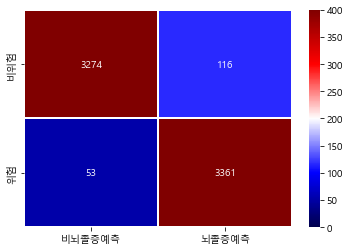

In [54]:
#train confusion_matrix
c = confusion_matrix(y_train,pred)
sns.heatmap(c,annot=True,fmt='d',linewidths=0.2,cmap='seismic',
           vmin = 0 , vmax=400,xticklabels = ['비뇌졸증예측','뇌졸증예측'],
           yticklabels=['비위험','위험'])
plt.show()

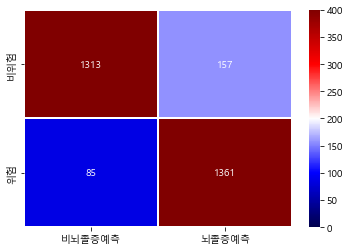

In [55]:
#test confusion_matrix
c = confusion_matrix(y_test,pred1)
sns.heatmap(c,annot=True,fmt='d',linewidths=0.2,cmap='seismic',
           vmin = 0 , vmax=400,xticklabels = ['비뇌졸증예측','뇌졸증예측'],
           yticklabels=['비위험','위험'])
plt.show()